In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Problem Statement

Stock trading is one of the most popular investments. However it takes a lot of effort for one to be professional on stock trading. In addition, there are too many factors affecting the stock price, e.g. physical and psychological factors, rational and irrational behaviour and so on.

As references for stock prediction analysis, there is basic information like company's income, cash flow and balance sheets, and also historical data like stock price and trading volume. The interest of this project is to analyse on what is the potential data having impact on the stock prices or stock profit of different companies. Moreover, relying on the relevant data found, we intend to build a forecasting AI model that can assist on stock trading by providing stock price prediction in order to save the hectic work every trader has to do to gain profit.


**Note**

data fetched from - https://www.alphavantage.co/documentation/

sample download url - https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&apikey=MK1GEJDNETPTPHE9&datatype=csv&outputsize=full

APIKEY = MK1GEJDNETPTPHE9

API call frequency is 5 calls per minute and 500 calls per day

In [2]:
"""
  Loading Apple fundamental data
"""

base_url = 'https://www.alphavantage.co/query?'
# income statement
url = f'{base_url}function=INCOME_STATEMENT&symbol=AAPL&apikey=MK1GEJDNETPTPHE9'
i = requests.get(url)
apple_income_statement = i.json()
# balance sheet
url = f'{base_url}function=BALANCE_SHEET&symbol=AAPL&apikey=MK1GEJDNETPTPHE9'
b = requests.get(url)
apple_balance_sheet = b.json()
# cash flow
url = f'{base_url}function=CASH_FLOW&symbol=AAPL&apikey=MK1GEJDNETPTPHE9'
c = requests.get(url)
apple_cash_flow = c.json()
# earning
url = f'{base_url}function=EARNINGS&symbol=AAPL&apikey=MK1GEJDNETPTPHE9'
e = requests.get(url)
apple_earning = e.json()

print(apple_income_statement)
print(apple_balance_sheet)
print(apple_cash_flow)
print(apple_earning)

{'symbol': 'AAPL', 'annualReports': [{'fiscalDateEnding': '2021-09-30', 'reportedCurrency': 'USD', 'grossProfit': '152836000000', 'totalRevenue': '363172000000', 'costOfRevenue': '234954000000', 'costofGoodsAndServicesSold': '212981000000', 'operatingIncome': '108949000000', 'sellingGeneralAndAdministrative': '21973000000', 'researchAndDevelopment': '21914000000', 'operatingExpenses': '43887000000', 'investmentIncomeNet': '2843000000', 'netInterestIncome': '-2645000000', 'interestIncome': '2843000000', 'interestExpense': '2645000000', 'nonInterestIncome': '365817000000', 'otherNonOperatingIncome': '60000000', 'depreciation': '9500000000', 'depreciationAndAmortization': '11284000000', 'incomeBeforeTax': '109207000000', 'incomeTaxExpense': '14527000000', 'interestAndDebtExpense': '2645000000', 'netIncomeFromContinuingOperations': '94680000000', 'comprehensiveIncomeNetOfTax': '95249000000', 'ebit': '111852000000', 'ebitda': '123136000000', 'netIncome': '94680000000'}, {'fiscalDateEnding':

In [3]:
# create a function to convert json fundamental data to dataframe that can be used to do plotting and training 
# will only take 'quarterlyReports' 
def convert_fundamental_data(json_data):
  # look for quarterlyReports
  quarterly_reports = json_data.get("quarterlyReports", [])
  df = pd.DataFrame(quarterly_reports)
  # return df.set_index('fiscalDateEnding').iloc[::-1]
  return df.iloc[::-1]
  

In [4]:
df_apple_income = convert_fundamental_data(apple_income_statement)
df_apple_cash_flow = convert_fundamental_data(apple_cash_flow)
df_apple_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 19 to 0
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   fiscalDateEnding                   20 non-null     object
 1   reportedCurrency                   20 non-null     object
 2   grossProfit                        20 non-null     object
 3   totalRevenue                       20 non-null     object
 4   costOfRevenue                      20 non-null     object
 5   costofGoodsAndServicesSold         20 non-null     object
 6   operatingIncome                    20 non-null     object
 7   sellingGeneralAndAdministrative    20 non-null     object
 8   researchAndDevelopment             20 non-null     object
 9   operatingExpenses                  20 non-null     object
 10  investmentIncomeNet                20 non-null     object
 11  netInterestIncome                  20 non-null     object
 12  interestIn

In [5]:
"""
  Loading Apple stock price data
"""

# load apple stocks csv into dataframe
base_path = './'
apple_csv_path = f'{base_path}daily_AAPL.csv'

df_apple_stock = pd.read_csv(apple_csv_path)

# take a look at the general info of the stock price dataset
df_apple_stock.describe()

,open,high,low,close,volume
count,5649.000000,5649.000000,5649.000000,5649.000000,5.649000e+03
mean,174.194808,176.131886,172.130910,174.188198,2.932773e+07
std,154.909655,156.191424,153.419848,154.843122,2.846192e+07
min,12.990000,13.190000,12.720000,13.120000,7.025000e+05
25%,66.680000,67.320000,65.020000,66.450000,1.070390e+07
50%,127.030000,128.320000,125.600000,126.900000,2.187336e+07
75%,208.500000,210.450000,206.760000,208.850000,3.648656e+07
max,702.410000,705.070000,699.570000,702.100000,3.326072e+08


### correlation checking on apple income data with stock close price

<AxesSubplot:>

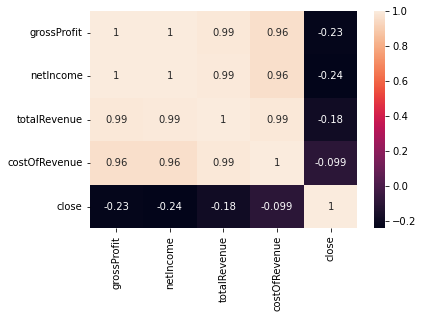

In [6]:
"""
  fundamental data analysis for apple stock
  merge apple close price data into apple fundamental dataframe according to matching timeframe

  apparently not a strong correlation can be found between apple close price and the income data
"""

df_fundamental = df_apple_income.copy()
df_fundamental['timestamp'] = df_fundamental['fiscalDateEnding']
df_only_close = df_apple_stock.filter(items=['timestamp', 'close'])
df_merged = df_fundamental.merge(df_only_close, on="timestamp")
df_to_be_evaluated = df_merged.filter(items=['grossProfit', 'netIncome', 'totalRevenue', 'costOfRevenue', 'close'])

# because the column type from fundamental dataset is object, need to convert to float then can run corr()
df_to_be_evaluated['grossProfit'] = df_to_be_evaluated['grossProfit'].astype(float, errors = 'raise')
df_to_be_evaluated['netIncome'] = df_to_be_evaluated['netIncome'].astype(float, errors = 'raise')
df_to_be_evaluated['totalRevenue'] = df_to_be_evaluated['totalRevenue'].astype(float, errors = 'raise')
df_to_be_evaluated['costOfRevenue'] = df_to_be_evaluated['costOfRevenue'].astype(float, errors = 'raise')


sns.heatmap(df_to_be_evaluated.corr(), annot=True)

### correlation checking on apple cashflow data with stock close price

<AxesSubplot:>

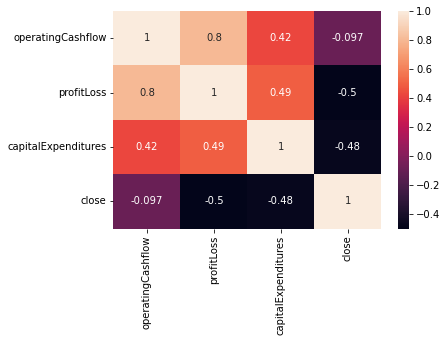

In [7]:
"""
    correlation checking on cash flow
"""

df_fundamental_2 = df_apple_cash_flow.copy()
df_fundamental_2['timestamp'] = df_fundamental_2['fiscalDateEnding']
df_only_close = df_apple_stock.filter(items=['timestamp', 'close'])
df_merged_2 = df_fundamental_2.merge(df_only_close, on="timestamp")
df_to_be_evaluated_2 = df_merged_2.filter(items=['operatingCashflow', 'profitLoss', 'capitalExpenditures', 'close'])

# because the column type from fundamental dataset is object, need to convert to float then can run corr()
df_to_be_evaluated_2['operatingCashflow'] = df_to_be_evaluated_2['operatingCashflow'].astype(float, errors = 'raise')
df_to_be_evaluated_2['profitLoss'] = df_to_be_evaluated_2['profitLoss'].astype(float, errors = 'raise')
df_to_be_evaluated_2['capitalExpenditures'] = df_to_be_evaluated_2['capitalExpenditures'].astype(float, errors = 'raise')


sns.heatmap(df_to_be_evaluated_2.corr(), annot=True)

### correlation checking on apple historical trading data 

<AxesSubplot:>

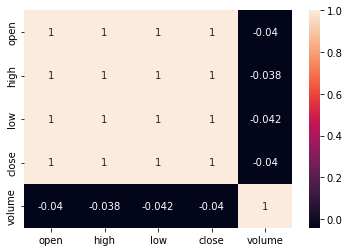

In [8]:
"""
  fundamental data does not seems to have high correlation,
  try to find in past trading data

  Heatmap for stock price data correlation
"""

sns.heatmap(df_apple_stock.corr(), annot=True)

### correlation checking on apple moving average trading volume and close price

<AxesSubplot:>

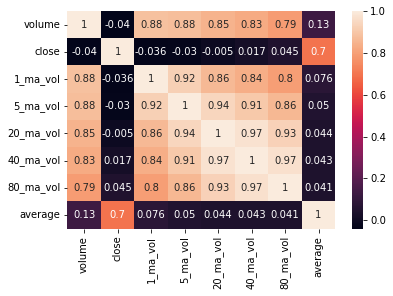

In [9]:
"""
  Try to find the variables that actually affect the stock price

  trying to make assumption that the previous trading volume will affect the price in future
  set new columns of moving averages for 1, 5, 20, 40 and 80 days and perform correlation checking
"""


new_apple_stock_price = df_apple_stock.filter(['volume', 'close'], axis=1)
new_apple_stock_price['1_ma_vol'] = new_apple_stock_price['volume'].rolling(1).mean().shift()
new_apple_stock_price['5_ma_vol'] = new_apple_stock_price['volume'].rolling(5).mean().shift()
new_apple_stock_price['20_ma_vol'] = new_apple_stock_price['volume'].rolling(20).mean().shift()
new_apple_stock_price['40_ma_vol'] = new_apple_stock_price['volume'].rolling(40).mean().shift()
new_apple_stock_price['80_ma_vol'] = new_apple_stock_price['volume'].rolling(80).mean().shift()
new_apple_stock_price['average'] = (df_apple_stock['high'] - df_apple_stock['low']) / 2
sns.heatmap(new_apple_stock_price.corr(), annot=True)

<AxesSubplot:xlabel='5_ma_vol', ylabel='close'>

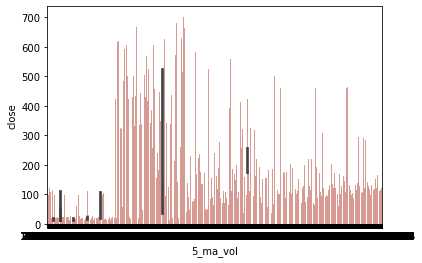

In [10]:
"""
  use the moving average volume colume(1 day) with highest corr which is 0.076 to plot a bar chart
  apparently past trading volume does not seem to have a huge impact on the future stock price
"""
sns.barplot(data=new_apple_stock_price, x = "5_ma_vol", y="close", color="salmon", saturation=.5)

### correlation checking on apple moving average daily price margin and close price

<AxesSubplot:>

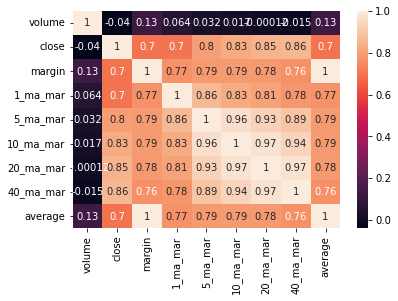

In [11]:
"""
  Try to find the variables that actually affect the stock price

  trying to make assumption that the previous daily margin will affect the price in future
  use moving average to set new columns for 1, 5, 10, 20, and 40 days and perform correlation checking
"""

new_2_apple_stock_price = df_apple_stock.filter(['volume', 'close'], axis=1)
new_2_apple_stock_price['margin'] = df_apple_stock['high'] - df_apple_stock['low']
new_2_apple_stock_price['1_ma_mar'] = new_2_apple_stock_price['margin'].rolling(1).mean().shift()
new_2_apple_stock_price['5_ma_mar'] = new_2_apple_stock_price['margin'].rolling(5).mean().shift()
new_2_apple_stock_price['10_ma_mar'] = new_2_apple_stock_price['margin'].rolling(10).mean().shift()
new_2_apple_stock_price['20_ma_mar'] = new_2_apple_stock_price['margin'].rolling(20).mean().shift()
new_2_apple_stock_price['40_ma_mar'] = new_2_apple_stock_price['margin'].rolling(40).mean().shift()
new_2_apple_stock_price['average'] = (df_apple_stock['high'] - df_apple_stock['low']) / 2
sns.heatmap(new_2_apple_stock_price.corr(), annot=True)

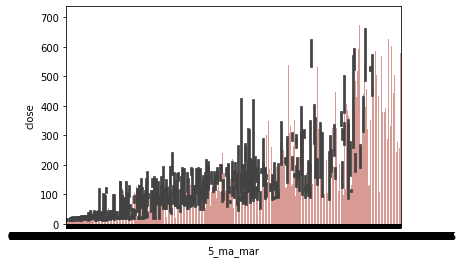

In [ ]:
"""
  use the moving average margin colume(5 days) with highest corr which is 0.79 to plot a bar chart
  apparently past stock margin does have a huge impact on the future stock price

  from here we can actually deduce that using past margin data as a predictor can result in a decent model 
"""
sns.barplot(data=new_2_apple_stock_price, x = "5_ma_mar", y="close", color="salmon", saturation=.5)

### correlation checking on apple moving average daily return and close price

<AxesSubplot:>

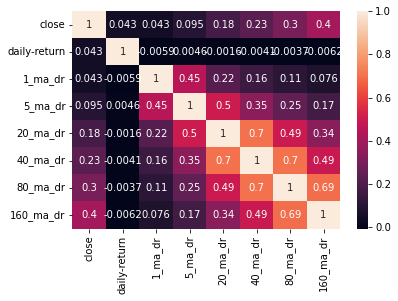

In [12]:
"""
  daily return mesaure how good the stock has performed on each day
  will daily return in the past have impact to the future stock price?
"""
new_3_apple_stock_price = df_apple_stock.filter(['close'], axis=1)
new_3_apple_stock_price['daily-return'] = new_3_apple_stock_price['close'].pct_change()
new_3_apple_stock_price['1_ma_dr'] = new_3_apple_stock_price['daily-return'].rolling(1).mean().shift()
new_3_apple_stock_price['5_ma_dr'] = new_3_apple_stock_price['daily-return'].rolling(5).mean().shift()
new_3_apple_stock_price['20_ma_dr'] = new_3_apple_stock_price['daily-return'].rolling(20).mean().shift()
new_3_apple_stock_price['40_ma_dr'] = new_3_apple_stock_price['daily-return'].rolling(40).mean().shift()
new_3_apple_stock_price['80_ma_dr'] = new_3_apple_stock_price['daily-return'].rolling(80).mean().shift()
new_3_apple_stock_price['160_ma_dr'] = new_3_apple_stock_price['daily-return'].rolling(160).mean().shift()
sns.heatmap(new_3_apple_stock_price.corr(), annot=True)

<AxesSubplot:xlabel='160_ma_dr', ylabel='close'>

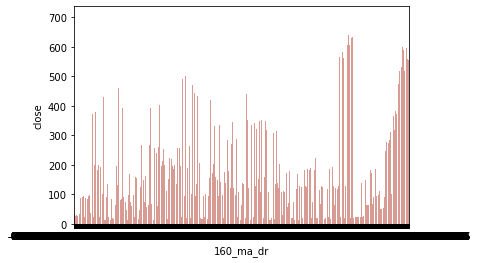

In [13]:
"""
  use the moving average daily return colume(160 days) with highest corr which is 0.4 to plot a bar chart
  although it can still be higher if the number of days is increased, but what can be observed is that, higher
  daily return of the past averageing from more days can actually result in a better stock price in the future.
"""
sns.barplot(data=new_3_apple_stock_price, x = "160_ma_dr", y="close", color="salmon", saturation=.5)

### correlation checking on competitors' stock prices

In [14]:
# load csv into dataframe
base_path = './'
apple_csv_path = f'{base_path}daily_AAPL.csv'
google_csv_path = f'{base_path}daily_GOOGL.csv'
tesla_csv_path = f'{base_path}daily_TSLA.csv'
meta_csv_path = f'{base_path}daily_FB.csv'

apple_df = pd.read_csv(apple_csv_path)
google_df = pd.read_csv(google_csv_path)
tesla_df = pd.read_csv(tesla_csv_path)
meta_df = pd.read_csv(meta_csv_path)


meta_df.head()

,timestamp,open,high,low,close,volume
0,2022-04-12,220.235,222.0300,213.1300,214.14,20128827
1,2022-04-11,218.420,220.6100,215.2198,216.46,20516586
2,2022-04-08,222.380,225.1300,220.0283,222.33,18375711
3,2022-04-07,223.930,225.5200,218.5600,222.95,21037187
4,2022-04-06,226.910,228.9899,221.4050,223.30,28995080


In [15]:
# cut 10 years data by half, reverse the dataframe and set timestamp as index
apple_df = apple_df.set_index('timestamp').truncate(before="2017-06-01").iloc[::-1]
google_df = google_df.set_index('timestamp').truncate(before="2017-06-01").iloc[::-1]
tesla_df = tesla_df.set_index('timestamp').truncate(before="2017-06-01").iloc[::-1]
meta_df = meta_df.set_index('timestamp').truncate(before="2017-06-01").iloc[::-1]


meta_df.tail()

,open,high,low,close,volume
timestamp,,,,,
2022-04-06,226.910,228.9899,221.4050,223.30,28995080
2022-04-07,223.930,225.5200,218.5600,222.95,21037187
2022-04-08,222.380,225.1300,220.0283,222.33,18375711
2022-04-11,218.420,220.6100,215.2198,216.46,20516586
2022-04-12,220.235,222.0300,213.1300,214.14,20128827


<AxesSubplot:>

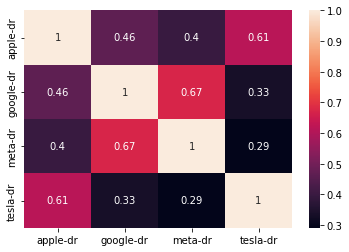

In [16]:
"""
  the correlation of daily returns from different company is quite high which shows that
  the daily return from stock of a company can be affect drastically by competitors' stock

  TODO: 2. basic stock price plot before perform corr checking, can use graph from bottom part
"""
df_stocks_prices = pd.DataFrame()
df_stocks_prices['apple-dr'] = apple_df['close'].pct_change()
df_stocks_prices['google-dr'] = google_df['close'].pct_change()
df_stocks_prices['meta-dr'] = meta_df['close'].pct_change()
df_stocks_prices['tesla-dr'] = tesla_df['close'].pct_change()
sns.heatmap(df_stocks_prices.corr(), annot=True)

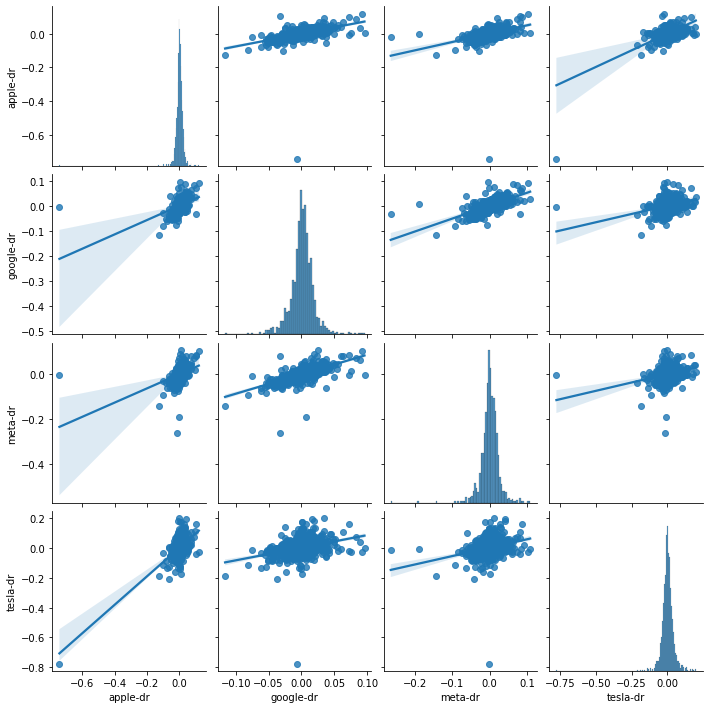

In [20]:
"""
  scatterplots drawn by using pairplot can also show a strong relationship
  of stock return between different company pairs
"""
sns.pairplot(df_stocks_prices, kind='reg')

In [17]:
# a general function for ploting of specific column
def plot_col(title, col_name):
  dfs = {
      'Apple': apple_df,
      'Tesla': tesla_df,
      'Google': google_df,
      'MEta': meta_df,
  }

  for k, df in dfs.items():
    df[col_name].plot(label=k)
  plt.title(title)
  plt.legend()

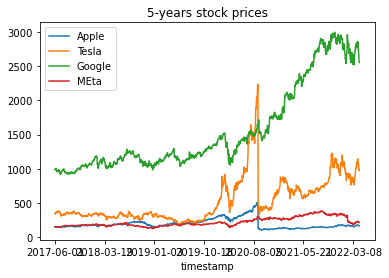

In [18]:
# chart of stock prices of apple, tesla, google and meta
plot_col("5-years stock prices", "close")

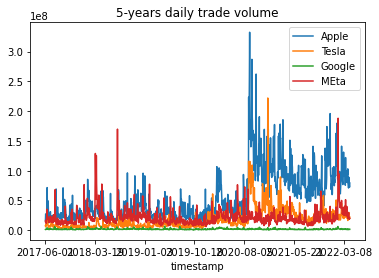

In [19]:
# chart of daily trade volume
plot_col("5-years daily trade volume", "volume")